In [1]:
import sys
print(sys.version)

3.5.2 (default, Nov 23 2017, 16:37:01) 
[GCC 5.4.0 20160609]


In [41]:
# This is a helper class to track computing time
import time
class Reporter(object):
    def __init__(self):
        self.ctime = time.time()
        self.stime = self.ctime
        self.ltime = self.ctime
        pass
    def report(self, string):
        self.ctime = time.time()
        print("dt: % 5.2f, total: % 8.2f -- %s" % (self.ctime - self.ltime, self.ctime - self.stime, string))
        self.ltime = self.ctime

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
import pymc3 as pm
import numpy as np
import theano as th

# list of available distributions
# https://docs.pymc.io/api/distributions.html

In [4]:
# Start generating simulated data
# The TFs: Number of TF and activation state of each
NX = 5
Xgt = dict(zip(list(range(NX)), [0]*NX))

# the target genes: Number of target genes and state of each
NY = 100
Y = dict(zip(list(range(NX,NX+NY)), [0]*NY))

In [5]:
# generate a random set of interations between TFs and genes
edges = {}
for trg in Y.keys():
    # randomize the number of TFs for this gene
    num_edges = np.random.binomial(3, 0.5)
    
    # pick random TFs
    for src in np.random.choice(list(Xgt.keys()), size=num_edges, replace=False):
        # here an edge can be upregulator (1), downregulator (-1) or not valid (0)
        edges[(src, trg)] = np.random.choice([-1, 0, 1])
    

In [6]:
# A small visualization of the interactions between TFs and target genes
G = nx.DiGraph()
G.add_nodes_from(Xgt.keys())
G.add_nodes_from(Y.keys())
G.add_edges_from(edges.keys())

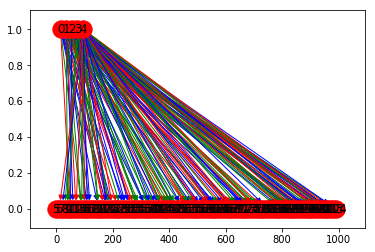

In [7]:
# a dictionary for mapping colors to signs
cdict = {-1: 'g',
         0: 'b',
         1: 'r'}

labels = {}
for node in G.nodes():
    G.nodes[node]['label'] = node
    labels[node] = node

for u,v in G.edges():
    G[u][v]['color'] = cdict[edges[(u,v)]]
colors = [G[u][v]['color'] for u,v in G.edges()]
    
pos = {}
for i, node in enumerate(Xgt.keys()):
    pos[node] = [i*20+15, 1]
for i, node in enumerate(Y.keys()):
    pos[node] = [i*10, 0]

nx.draw_networkx_nodes(G, pos=pos, nodelist=Xgt.keys())
nx.draw_networkx_nodes(G, pos=pos, nodelist=Y.keys())
nx.draw_networkx_edges(G, pos=pos, edge_color=colors)
nx.draw_networkx_labels(G, pos=pos, labels=labels, font_size=12)
plt.show()

<BarContainer object of 10 artists>

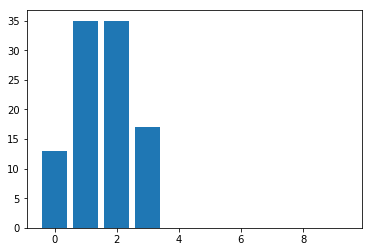

In [8]:
#list(G.predecessors(27))
h = nx.degree_histogram(G)[:10]
plt.bar(range(len(h)), h)

In [9]:
# randomize current activation state for TFs
# and then determine the state of targeted genes
for src in Xgt.keys():
    # either active (1) or inactive (0)
    Xgt[src] = np.random.choice([0, 1])
    if Xgt[src] != 0:
        for trg in Y.keys():
            edge = src, trg
            if edge in edges.keys():
                if edges[edge] < 0 and Xgt[src] > 0:
                    # if TF is inhibitor, make sure the response is definitive
                    Y[trg] += edges[edge]*Xgt[src]*10000
                else:
                    Y[trg] += edges[edge]*Xgt[src]

In [10]:
Xgt

{0: 0, 1: 1, 2: 1, 3: 0, 4: 0}

In [11]:
Y

{5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: -10000,
 10: 0,
 11: 0,
 12: 1,
 13: 0,
 14: -10000,
 15: 0,
 16: 0,
 17: -10000,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 2,
 23: 0,
 24: -10000,
 25: 0,
 26: 0,
 27: 0,
 28: -10000,
 29: 0,
 30: 0,
 31: 0,
 32: 2,
 33: 1,
 34: -10000,
 35: -10000,
 36: 0,
 37: -10000,
 38: 0,
 39: -10000,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 0,
 45: -10000,
 46: -10000,
 47: -9999,
 48: 0,
 49: 0,
 50: -10000,
 51: 0,
 52: 1,
 53: -10000,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 1,
 61: 1,
 62: 0,
 63: 0,
 64: 0,
 65: 1,
 66: 0,
 67: 1,
 68: -10000,
 69: 1,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 1,
 75: -10000,
 76: 0,
 77: 1,
 78: -10000,
 79: 1,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: -10000,
 85: 0,
 86: 1,
 87: 0,
 88: 0,
 89: -9999,
 90: 0,
 91: 0,
 92: 1,
 93: 0,
 94: -10000,
 95: 0,
 96: -10000,
 97: 0,
 98: 0,
 99: 1,
 100: 0,
 101: 0,
 102: -10000,
 103: 1,
 104: -10000}

In [12]:
# get only the signs for gene activation states
for trg in Y.keys():
    Y[trg] = np.sign(Y[trg])

In [13]:
Y

{5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: -1,
 10: 0,
 11: 0,
 12: 1,
 13: 0,
 14: -1,
 15: 0,
 16: 0,
 17: -1,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 1,
 23: 0,
 24: -1,
 25: 0,
 26: 0,
 27: 0,
 28: -1,
 29: 0,
 30: 0,
 31: 0,
 32: 1,
 33: 1,
 34: -1,
 35: -1,
 36: 0,
 37: -1,
 38: 0,
 39: -1,
 40: 0,
 41: 0,
 42: 0,
 43: 1,
 44: 0,
 45: -1,
 46: -1,
 47: -1,
 48: 0,
 49: 0,
 50: -1,
 51: 0,
 52: 1,
 53: -1,
 54: 0,
 55: 0,
 56: 0,
 57: 0,
 58: 0,
 59: 0,
 60: 1,
 61: 1,
 62: 0,
 63: 0,
 64: 0,
 65: 1,
 66: 0,
 67: 1,
 68: -1,
 69: 1,
 70: 0,
 71: 0,
 72: 0,
 73: 0,
 74: 1,
 75: -1,
 76: 0,
 77: 1,
 78: -1,
 79: 1,
 80: 0,
 81: 0,
 82: 0,
 83: 0,
 84: -1,
 85: 0,
 86: 1,
 87: 0,
 88: 0,
 89: -1,
 90: 0,
 91: 0,
 92: 1,
 93: 0,
 94: -1,
 95: 0,
 96: -1,
 97: 0,
 98: 0,
 99: 1,
 100: 0,
 101: 0,
 102: -1,
 103: 1,
 104: -1}

In [14]:
# this is the possible associations data
rels = pd.DataFrame(list(edges.keys()), columns=['srcuid', 'trguid'])
rels = rels.assign(val=list(edges.values()))

In [98]:
# extract a dataframe that only contains relevant interactions
rels2 = rels[rels['trguid'].isin(Y.keys())]

# create several dictionaries for mapping uids to a range starting from zero
# this is for better performance by making a single function call
# to create the distributions in pymc3
xs = rels2['srcuid'].unique()
ys = Y.keys()
Dx = dict(zip(xs, range(len(xs))))
Dy = dict(zip(ys, range(len(ys))))

# this is the inverse of the dictionary
# it simply goes in the reverse direction
ADx = {}
for src, i in Dx.items():
    ADx[i] = src

Ds = {}
ADs = {}
for i, (index, row) in enumerate(rels2.iterrows()):
    src = row['srcuid']
    trg = row['trguid']
    Ds[(src, trg)] = i
    ADs[i] = src, trg

Xres = pd.DataFrame()
Sres = pd.DataFrame()
Rres = pd.DataFrame()

In [99]:
def buildModel(reporter):
    model = pm.Model()

    with model:
        p = {}

        reporter.report('Start')

        # Unobserved states for TFs
        #X = pm.Beta('X', shape=(len(Dx),), alpha=0.5, beta=0.5)
        X = pm.LogitNormal('X', mu=-0.75, tau=0.1, shape=(len(Dx),))
        reporter.report('Created TF state variables')

        # Unobserved edges aplicability
        #R = pm.Beta('R', shape=(len(Ds),), alpha=0.5, beta=0.65)
        R = pm.LogitNormal('R', mu=-0.75, tau=0.1, shape=(len(Ds),))
        reporter.report('Created R edge aplicability variables')

        # Unobserved signs of edges (positive or negative)
        #S = pm.Beta('S', shape=(len(Ds),), alpha=0.5, beta=0.5)
        S = pm.LogitNormal('S', mu=0, tau=0.1, shape=(len(Ds),))
        reporter.report('Created S sign variables')

        # Wire up the logic
        T = {}
        for trg, j in Dy.items():
            T[j] = {}

        for (src, trg), k in Ds.items():
            i = Dx[src]
            j = Dy[trg]
            T[j][i] = 1 - X[i] * S[k] * R[k] # X ^ S ^ R

        reporter.report('Completed gates for Ts')

        U = {}
        for trg, j in Dy.items():
            U[j] = {}

        for (src, trg), k in Ds.items():
            i = Dx[src]
            j = Dy[trg]
            U[j][i] = 1 - X[i] * (1 - S[k]) * R[k] # X ^ ¬S ^ R

        reporter.report('Completed gates for Us')

        # OR gate for all TFs potentially activating genes
        t = {}
        for trg, j in Dy.items():
            t[j] = 1.
            for i in T[j].keys():
                t[j] *= T[j][i]
            t[j] = 1 - t[j]

        # OR gate for all TFs potentially repressing genes
        u = {}
        for trg, j in Dy.items():
            u[j] = 1.
            for i in U[j].keys():
                u[j] *= U[j][i]
            u[j] = 1 - u[j]

        ## There is no AND gate in this part of this model
        #p = {}
        #for trg, j in Dy.items():
        #    p[j] = t[j] * (1 - u[j])
        #reporter.report('Completed gates for Ps')

        # need to convert dictionaries into lists
        tt, uu = [], []
        for trg, j in Dy.items():
            tt.append(t[j])
            uu.append(u[j])

        # in this model we are going to use a Multinomial distribution
        # pymc3 is picky with the p argument, it requires a tensor object
        tt = th.tensor.cast(tt, 'float32')
        uu = th.tensor.cast(uu, 'float32')
        # the Y = -1 value is given by the inhibitors brach of the circuit
        p0 = uu/2
        # the Y = 1 value is given by the activators brach of the circuit
        p2 = tt/2
        # the Y = 0 value is given by the complement
        p1 = 1 - p0 - p2
        # put together the matrix for p
        pp = th.tensor.stack([p0, p1, p2], axis=1)

        # setup the observations in the format required by the multinomial likelihood
        YY = []
        for trg, j in Dy.items():
            tmp = [0, 0, 0]
            tmp[1 + Y[trg]] = 1
            YY.append(tmp)

        xx, XX = [], []
        for idx, row in Xres.iterrows():
            xx.append(X[idx])
            XX.append(row['pred'])

        ss, SS = [], []
        for idx, row in Sres.iterrows():
            ss.append(S[idx])
            SS.append(row['pred'])

        rr, RR = [], []
        for idx, row in Rres.iterrows():
            rr.append(R[idx])
            RR.append(row['pred'])

        reporter.report('Rearranged Ps and Ys for likelihood function')

        # the likelihood
        D = pm.Multinomial('D', n=1, p=pp, observed=YY)
        Xlike = pm.Bernoulli('Xlike', p=xx, observed=XX)
        Slike = pm.Bernoulli('Slike', p=ss, observed=SS)
        Rlike = pm.Bernoulli('Rlike', p=rr, observed=RR)
        reporter.report('Set observed distributions')
    return model

In [100]:
def runInference(model, reporter, samplescale=10):
    reporter.report('Start')
    with model:
        reporter.report('Model Initiated')
        # draw posterior samples
        step = pm.Metropolis()
        trace = pm.sample(tune=2000*samplescale, draws=1000*samplescale, step=step, chains=3, njobs=3)
        reporter.report('Finished Sampling')

    result = pm.summary(trace)
    return result

In [101]:
def updateXres(result, lenient=False):
    Xres = result.loc[['X__%d'%i for i in range(len(Dx))]]
    Xres = Xres.drop(columns=['mc_error', 'hpd_2.5', 'hpd_97.5', 'n_eff', 'Rhat'])
    Xres = Xres.assign(idx=[i for i in range(len(Dx))])
    Xres = Xres.set_index('idx')
    Xres = Xres.assign(srcuid=[ADx[i] for i in range(len(Dx))])
    Xres = Xres.assign(ground_truth=[Xgt[src] for src in Xres['srcuid']])
    if lenient:
        conditions = [Xres['mean'] < 0.6, Xres['mean'] >= 0.6]
    else:
        conditions = [Xres['mean'] < 0.2, Xres['mean'] >= 0.8]
    choices = [0, 1]
    Xres = Xres.assign(pred=np.select(conditions, choices, default=-99))
    # filter out where predictions where not made
    Xres = Xres[Xres['pred']!=-99]
    Xres = Xres.assign(correctness=Xres['ground_truth']==Xres['pred'])
    return Xres

In [102]:
def updateRres(result, Xres):
    # filter R variables
    Rres = result.loc[['R__%d'%i for i in range(len(Ds))]]
    Rres = Rres.assign(idx=[i for i in range(len(Ds))])
    Rres = Rres.set_index('idx')
    # remove unused columns
    Rres = Rres.drop(columns=['mc_error', 'hpd_2.5', 'hpd_97.5', 'n_eff', 'Rhat'])
    # associate variable R with its corresponding edge
    Rres = Rres.assign(edge=[ADs[i] for i in range(len(Ds))])
    # column for srcuid
    Rres = Rres.assign(srcuid=[src for src, trg in Rres['edge']])
    # column for trguid
    Rres = Rres.assign(trguid=[trg for src, trg in Rres['edge']])
    # extract edges related to TFs with low confidence of being activated
    Rres = Rres[Rres['srcuid'].isin(Xres['srcuid'])]
    # specify whether TF was active in this experiment
    # only active TFs provide useful information in the inference proccess
    Rres = Rres.assign(srcactive=[Xres.loc[Dx[src]]['pred'] for src in Rres['srcuid']])
    # the ground truth. Here S represents the sign of regulation
    Rres = Rres.assign(ground_truth=[abs(edges[edge]) for edge in Rres['edge']])
    # process prediction values
    conditions = [Rres['mean'] < 0.3, Rres['mean'] >= 0.7]
    choices = [0, 1]
    Rres = Rres.assign(pred=np.select(conditions, choices, default=-99))
    # filter out where predictions where not made
    Rres = Rres[Rres['pred']!=-99]
    # compare ground truth with predicted value
    Rres = Rres.assign(correctness=Rres['ground_truth']==Rres['pred'])
    # show only edges from active TFs. 
    Rres = Rres[Rres['srcactive']>0]
    return Rres

In [103]:
def updateSres(result, Xres, Rres, Sres):
    prevSreslen = len(Sres)
    # filter S variables
    Sres = result.loc[['S__%d'%i for i in range(len(Ds))]]
    Sres = Sres.assign(idx=[i for i in range(len(Ds))])
    Sres = Sres.set_index('idx')
    # remove unused columns
    Sres = Sres.drop(columns=['mc_error', 'hpd_2.5', 'hpd_97.5', 'n_eff', 'Rhat'])
    # associate variable S with its corresponding edge
    Sres = Sres.assign(edge=[ADs[i] for i in range(len(Ds))])
    # column for srcuid
    Sres = Sres.assign(srcuid=[src for src, trg in Sres['edge']])
    # column for trguid
    Sres = Sres.assign(trguid=[trg for src, trg in Sres['edge']])
    # extract edges related to TFs with low confidence of being activated
    Sres = Sres[Sres['srcuid'].isin(Xres['srcuid'])]
    # specify whether TF was active in this experiment
    # only active TFs provide useful information in the inference proccess
    Sres = Sres.assign(srcactive=[Xres.loc[Dx[src]]['pred'] for src in Sres['srcuid']])
    # the ground truth. Here S represents the sign of regulation
    Sres = Sres.assign(ground_truth=[edges[edge] for edge in Sres['edge']])
    # process prediction values
    #conditions = [Sres['mean'] < 0.5, Sres['mean'] >= 0.5]
    conditions = [Sres['mean'] < 0.3, Sres['mean'] >= 0.7]
    choices = [-1, 1]
    Sres = Sres.assign(prediction=np.select(conditions, choices, default=0))
    choices = [0, 1]
    Sres = Sres.assign(pred=np.select(conditions, choices, default=0))
    # filter out where predictions where not made
    Sres = Sres[Sres['prediction']!=0]
    # compare ground truth with predicted value
    Sres = Sres.assign(correctness=Sres['ground_truth']==Sres['prediction'])
    # show only edges from active TFs. 
    Sres = Sres[Sres['srcactive']>0]
    Sres = Sres[Sres['edge'].isin(Rres['edge'])]
    Sres['applicable'] = Rres['pred']
    Sres = Sres[Sres['applicable']>0]
    Sres.sort_values(by=['edge'])
    #if prevSreslen - len(Sres) < 2:
    #    plen = len(Rres)
    #    Rres = Rres[Rres['edge'].isin(Sres['edge'])]
    #    print("removed %d edges from Rres" % (plen - len(Rres)))
    return Rres, Sres

In [104]:
def printResults():
    Xacc = Xres['correctness'].value_counts(normalize=True)[True]
    print('% 4d TF status have been infered with enough confidence.' % len(Xres), '\t  Accuracy: ', Xacc)

    Racc = Rres['correctness'].value_counts(normalize=True)[True]
    print('% 4d edge applicability have been infered with enough confidence.' % len(Rres), 'Accuracy: ', Racc)

    Sacc = Sres['correctness'].value_counts(normalize=True)[True]
    print('% 4d edge signs have been infered with enough confidence.' % len(Sres), '\t  Accuracy: ', Sacc)

In [105]:
reporter = Reporter()
lenientX = False
for i in range(100):
    discoveryStatus = len(Xres), len(Rres), len(Sres)
    model = buildModel(reporter)
    result = runInference(model, reporter, samplescale=10)
    Xres = updateXres(result, lenient=lenientX)
    Rres = updateRres(result, Xres)
    Rres, Sres = updateSres(result, Xres, Rres, Sres)
    printResults()
    if discoveryStatus == (len(Xres), len(Rres), len(Sres)):
        repeatedDiscovery += 1
    else:
        repeatedDiscovery = 0
    if repeatedDiscovery > 2 and not lenientX:
        lenientX = True
    elif repeatedDiscovery > 2:
        print('No new discoveries in the last 3 runs')
        print('%d iterations were completed. Quitting now...' % (i + 1) )
        break


dt:  0.00, total:     0.00 -- Start
dt:  0.29, total:     0.29 -- Created TF state variables
dt:  0.29, total:     0.58 -- Created R edge aplicability variables
dt:  0.29, total:     0.86 -- Created S sign variables
dt:  0.53, total:     1.40 -- Completed gates for Ts
dt:  0.64, total:     2.04 -- Completed gates for Us
dt:  0.41, total:     2.44 -- Rearranged Ps and Ys for likelihood function
dt:  0.39, total:     2.83 -- Set observed distributions
dt:  0.00, total:     2.83 -- Start
dt:  0.00, total:     2.83 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:28<00:00, 1011.95draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  118.25, total:   121.08 -- Finished Sampling
   2 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  16 edge applicability have been infered with enough confidence. Accuracy:  1.0
  13 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.46, total:   126.55 -- Start
dt:  0.30, total:   126.85 -- Created TF state variables
dt:  0.29, total:   127.14 -- Created R edge aplicability variables
dt:  0.29, total:   127.43 -- Created S sign variables
dt:  0.54, total:   127.97 -- Completed gates for Ts
dt:  0.64, total:   128.61 -- Completed gates for Us
dt:  0.43, total:   129.04 -- Rearranged Ps and Ys for likelihood function
dt:  0.55, total:   129.59 -- Set observed distributions
dt:  0.00, total:   129.59 -- Start
dt:  0.00, total:   129.59 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:29<00:00, 1008.18draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  119.99, total:   249.58 -- Finished Sampling
   2 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  18 edge applicability have been infered with enough confidence. Accuracy:  1.0
  15 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.33, total:   254.90 -- Start
dt:  0.29, total:   255.19 -- Created TF state variables
dt:  0.29, total:   255.48 -- Created R edge aplicability variables
dt:  0.30, total:   255.78 -- Created S sign variables
dt:  0.54, total:   256.32 -- Completed gates for Ts
dt:  0.64, total:   256.96 -- Completed gates for Us
dt:  0.43, total:   257.39 -- Rearranged Ps and Ys for likelihood function
dt:  0.56, total:   257.95 -- Set observed distributions
dt:  0.00, total:   257.95 -- Start
dt:  0.00, total:   257.95 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:34<00:00, 954.03draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  125.74, total:   383.69 -- Finished Sampling
   2 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  21 edge applicability have been infered with enough confidence. Accuracy:  1.0
  16 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.94, total:   389.63 -- Start
dt:  0.30, total:   389.93 -- Created TF state variables
dt:  0.29, total:   390.23 -- Created R edge aplicability variables
dt:  0.29, total:   390.52 -- Created S sign variables
dt:  0.54, total:   391.06 -- Completed gates for Ts
dt:  0.64, total:   391.70 -- Completed gates for Us
dt:  0.43, total:   392.14 -- Rearranged Ps and Ys for likelihood function
dt:  0.55, total:   392.69 -- Set observed distributions
dt:  0.00, total:   392.69 -- Start
dt:  0.00, total:   392.69 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:30<00:00, 989.43draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  121.73, total:   514.42 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  22 edge applicability have been infered with enough confidence. Accuracy:  1.0
  16 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.40, total:   519.82 -- Start
dt:  0.29, total:   520.11 -- Created TF state variables
dt:  0.29, total:   520.40 -- Created R edge aplicability variables
dt:  0.29, total:   520.69 -- Created S sign variables
dt:  0.54, total:   521.23 -- Completed gates for Ts
dt:  0.65, total:   521.88 -- Completed gates for Us
dt:  0.43, total:   522.31 -- Rearranged Ps and Ys for likelihood function
dt:  0.48, total:   522.80 -- Set observed distributions
dt:  0.00, total:   522.80 -- Start
dt:  0.00, total:   522.80 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:33<00:00, 959.26draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  125.12, total:   647.92 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  23 edge applicability have been infered with enough confidence. Accuracy:  1.0
  16 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.96, total:   653.88 -- Start
dt:  0.30, total:   654.18 -- Created TF state variables
dt:  0.29, total:   654.47 -- Created R edge aplicability variables
dt:  0.30, total:   654.77 -- Created S sign variables
dt:  0.54, total:   655.30 -- Completed gates for Ts
dt:  0.64, total:   655.95 -- Completed gates for Us
dt:  0.43, total:   656.38 -- Rearranged Ps and Ys for likelihood function
dt:  0.47, total:   656.86 -- Set observed distributions
dt:  0.00, total:   656.86 -- Start
dt:  0.00, total:   656.86 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:30<00:00, 992.46draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  121.27, total:   778.12 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  26 edge applicability have been infered with enough confidence. Accuracy:  1.0
  16 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.61, total:   783.73 -- Start
dt:  0.30, total:   784.03 -- Created TF state variables
dt:  0.29, total:   784.32 -- Created R edge aplicability variables
dt:  0.29, total:   784.61 -- Created S sign variables
dt:  0.54, total:   785.15 -- Completed gates for Ts
dt:  0.65, total:   785.80 -- Completed gates for Us
dt:  0.44, total:   786.23 -- Rearranged Ps and Ys for likelihood function
dt:  0.47, total:   786.71 -- Set observed distributions
dt:  0.00, total:   786.71 -- Start
dt:  0.00, total:   786.71 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:32<00:00, 977.17draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  122.55, total:   909.25 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  30 edge applicability have been infered with enough confidence. Accuracy:  1.0
  17 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.45, total:   914.70 -- Start
dt:  0.29, total:   914.99 -- Created TF state variables
dt:  0.29, total:   915.29 -- Created R edge aplicability variables
dt:  0.29, total:   915.58 -- Created S sign variables
dt:  0.54, total:   916.12 -- Completed gates for Ts
dt:  0.64, total:   916.76 -- Completed gates for Us
dt:  0.44, total:   917.20 -- Rearranged Ps and Ys for likelihood function
dt:  0.56, total:   917.76 -- Set observed distributions
dt:  0.00, total:   917.76 -- Start
dt:  0.00, total:   917.76 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:30<00:00, 997.69draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  121.50, total:  1039.26 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  31 edge applicability have been infered with enough confidence. Accuracy:  1.0
  18 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.70, total:  1044.97 -- Start
dt:  0.29, total:  1045.26 -- Created TF state variables
dt:  0.29, total:  1045.55 -- Created R edge aplicability variables
dt:  0.30, total:  1045.84 -- Created S sign variables
dt:  0.54, total:  1046.38 -- Completed gates for Ts
dt:  0.64, total:  1047.03 -- Completed gates for Us
dt:  0.44, total:  1047.47 -- Rearranged Ps and Ys for likelihood function
dt:  0.57, total:  1048.04 -- Set observed distributions
dt:  0.00, total:  1048.04 -- Start
dt:  0.00, total:  1048.04 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:35<00:00, 938.99draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  127.19, total:  1175.24 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  33 edge applicability have been infered with enough confidence. Accuracy:  1.0
  19 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.79, total:  1181.03 -- Start
dt:  0.30, total:  1181.33 -- Created TF state variables
dt:  0.29, total:  1181.62 -- Created R edge aplicability variables
dt:  0.29, total:  1181.91 -- Created S sign variables
dt:  0.54, total:  1182.45 -- Completed gates for Ts
dt:  0.64, total:  1183.09 -- Completed gates for Us
dt:  0.44, total:  1183.53 -- Rearranged Ps and Ys for likelihood function
dt:  0.57, total:  1184.11 -- Set observed distributions
dt:  0.00, total:  1184.11 -- Start
dt:  0.00, total:  1184.11 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:31<00:00, 987.11draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  122.23, total:  1306.34 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  34 edge applicability have been infered with enough confidence. Accuracy:  1.0
  20 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.77, total:  1312.11 -- Start
dt:  0.30, total:  1312.41 -- Created TF state variables
dt:  0.29, total:  1312.70 -- Created R edge aplicability variables
dt:  0.29, total:  1312.99 -- Created S sign variables
dt:  0.53, total:  1313.52 -- Completed gates for Ts
dt:  0.64, total:  1314.17 -- Completed gates for Us
dt:  0.44, total:  1314.61 -- Rearranged Ps and Ys for likelihood function
dt:  0.56, total:  1315.17 -- Set observed distributions
dt:  0.00, total:  1315.17 -- Start
dt:  0.00, total:  1315.17 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:28<00:00, 1012.27draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  119.79, total:  1434.96 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  36 edge applicability have been infered with enough confidence. Accuracy:  1.0
  21 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.42, total:  1440.39 -- Start
dt:  0.30, total:  1440.69 -- Created TF state variables
dt:  0.30, total:  1440.98 -- Created R edge aplicability variables
dt:  0.29, total:  1441.28 -- Created S sign variables
dt:  0.55, total:  1441.82 -- Completed gates for Ts
dt:  0.65, total:  1442.47 -- Completed gates for Us
dt:  0.45, total:  1442.92 -- Rearranged Ps and Ys for likelihood function
dt:  0.58, total:  1443.50 -- Set observed distributions
dt:  0.00, total:  1443.50 -- Start
dt:  0.00, total:  1443.50 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:32<00:00, 975.63draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  123.74, total:  1567.24 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  36 edge applicability have been infered with enough confidence. Accuracy:  1.0
  22 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.56, total:  1572.80 -- Start
dt:  0.29, total:  1573.09 -- Created TF state variables
dt:  0.29, total:  1573.38 -- Created R edge aplicability variables
dt:  0.29, total:  1573.68 -- Created S sign variables
dt:  0.55, total:  1574.22 -- Completed gates for Ts
dt:  0.65, total:  1574.87 -- Completed gates for Us
dt:  0.45, total:  1575.32 -- Rearranged Ps and Ys for likelihood function
dt:  0.48, total:  1575.80 -- Set observed distributions
dt:  0.00, total:  1575.80 -- Start
dt:  0.00, total:  1575.80 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:38<00:00, 912.61draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  130.52, total:  1706.32 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  37 edge applicability have been infered with enough confidence. Accuracy:  1.0
  24 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  6.27, total:  1712.59 -- Start
dt:  0.30, total:  1712.89 -- Created TF state variables
dt:  0.29, total:  1713.18 -- Created R edge aplicability variables
dt:  0.29, total:  1713.48 -- Created S sign variables
dt:  0.55, total:  1714.02 -- Completed gates for Ts
dt:  0.65, total:  1714.67 -- Completed gates for Us
dt:  0.46, total:  1715.13 -- Rearranged Ps and Ys for likelihood function
dt:  1.54, total:  1716.66 -- Set observed distributions
dt:  0.00, total:  1716.66 -- Start
dt:  0.00, total:  1716.66 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:32<00:00, 972.50draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  123.79, total:  1840.46 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  39 edge applicability have been infered with enough confidence. Accuracy:  1.0
  26 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.73, total:  1846.18 -- Start
dt:  0.29, total:  1846.47 -- Created TF state variables
dt:  0.29, total:  1846.76 -- Created R edge aplicability variables
dt:  0.29, total:  1847.05 -- Created S sign variables
dt:  0.53, total:  1847.59 -- Completed gates for Ts
dt:  0.64, total:  1848.23 -- Completed gates for Us
dt:  0.45, total:  1848.68 -- Rearranged Ps and Ys for likelihood function
dt:  0.57, total:  1849.26 -- Set observed distributions
dt:  0.00, total:  1849.26 -- Start
dt:  0.00, total:  1849.26 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:27<00:00, 914.16draws/s] 
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  118.72, total:  1967.98 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  39 edge applicability have been infered with enough confidence. Accuracy:  1.0
  26 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  6.03, total:  1974.01 -- Start
dt:  0.29, total:  1974.30 -- Created TF state variables
dt:  0.29, total:  1974.59 -- Created R edge aplicability variables
dt:  0.29, total:  1974.89 -- Created S sign variables
dt:  0.54, total:  1975.43 -- Completed gates for Ts
dt:  0.65, total:  1976.07 -- Completed gates for Us
dt:  0.45, total:  1976.53 -- Rearranged Ps and Ys for likelihood function
dt:  0.39, total:  1976.92 -- Set observed distributions
dt:  0.00, total:  1976.92 -- Start
dt:  0.00, total:  1976.92 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:30<00:00, 995.70draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  120.32, total:  2097.23 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  39 edge applicability have been infered with enough confidence. Accuracy:  1.0
  26 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.38, total:  2102.62 -- Start
dt:  0.30, total:  2102.92 -- Created TF state variables
dt:  0.30, total:  2103.21 -- Created R edge aplicability variables
dt:  0.30, total:  2103.51 -- Created S sign variables
dt:  0.55, total:  2104.06 -- Completed gates for Ts
dt:  0.65, total:  2104.71 -- Completed gates for Us
dt:  0.47, total:  2105.18 -- Rearranged Ps and Ys for likelihood function
dt:  0.38, total:  2105.56 -- Set observed distributions
dt:  0.00, total:  2105.56 -- Start
dt:  0.00, total:  2105.56 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:40<00:00, 897.84draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  130.54, total:  2236.11 -- Finished Sampling
   3 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  39 edge applicability have been infered with enough confidence. Accuracy:  1.0
  26 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.54, total:  2241.65 -- Start
dt:  0.30, total:  2241.95 -- Created TF state variables
dt:  0.29, total:  2242.24 -- Created R edge aplicability variables
dt:  0.29, total:  2242.53 -- Created S sign variables
dt:  0.54, total:  2243.07 -- Completed gates for Ts
dt:  0.64, total:  2243.71 -- Completed gates for Us
dt:  0.45, total:  2244.17 -- Rearranged Ps and Ys for likelihood function
dt:  0.38, total:  2244.55 -- Set observed distributions
dt:  0.00, total:  2244.55 -- Start
dt:  0.00, total:  2244.55 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:32<00:00, 976.91draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  121.86, total:  2366.41 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  39 edge applicability have been infered with enough confidence. Accuracy:  1.0
  26 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.33, total:  2371.73 -- Start
dt:  0.29, total:  2372.03 -- Created TF state variables
dt:  0.29, total:  2372.32 -- Created R edge aplicability variables
dt:  0.29, total:  2372.61 -- Created S sign variables
dt:  0.54, total:  2373.15 -- Completed gates for Ts
dt:  0.65, total:  2373.80 -- Completed gates for Us
dt:  0.45, total:  2374.25 -- Rearranged Ps and Ys for likelihood function
dt:  0.48, total:  2374.74 -- Set observed distributions
dt:  0.00, total:  2374.74 -- Start
dt:  0.00, total:  2374.74 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:33<00:00, 960.69draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  124.77, total:  2499.51 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  42 edge applicability have been infered with enough confidence. Accuracy:  1.0
  27 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.69, total:  2505.20 -- Start
dt:  0.30, total:  2505.50 -- Created TF state variables
dt:  0.30, total:  2505.80 -- Created R edge aplicability variables
dt:  0.29, total:  2506.09 -- Created S sign variables
dt:  0.54, total:  2506.63 -- Completed gates for Ts
dt:  0.65, total:  2507.28 -- Completed gates for Us
dt:  0.46, total:  2507.74 -- Rearranged Ps and Ys for likelihood function
dt:  1.69, total:  2509.42 -- Set observed distributions
dt:  0.00, total:  2509.42 -- Start
dt:  0.00, total:  2509.42 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:31<00:00, 981.90draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  122.91, total:  2632.33 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  42 edge applicability have been infered with enough confidence. Accuracy:  1.0
  29 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.37, total:  2637.70 -- Start
dt:  0.30, total:  2638.00 -- Created TF state variables
dt:  0.29, total:  2638.29 -- Created R edge aplicability variables
dt:  0.30, total:  2638.59 -- Created S sign variables
dt:  0.54, total:  2639.13 -- Completed gates for Ts
dt:  0.65, total:  2639.78 -- Completed gates for Us
dt:  0.46, total:  2640.23 -- Rearranged Ps and Ys for likelihood function
dt:  0.49, total:  2640.72 -- Set observed distributions
dt:  0.00, total:  2640.73 -- Start
dt:  0.00, total:  2640.73 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:38<00:00, 914.83draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  129.76, total:  2770.48 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  44 edge applicability have been infered with enough confidence. Accuracy:  1.0
  31 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.96, total:  2776.44 -- Start
dt:  0.30, total:  2776.75 -- Created TF state variables
dt:  0.29, total:  2777.04 -- Created R edge aplicability variables
dt:  0.29, total:  2777.33 -- Created S sign variables
dt:  0.54, total:  2777.88 -- Completed gates for Ts
dt:  0.64, total:  2778.52 -- Completed gates for Us
dt:  0.46, total:  2778.98 -- Rearranged Ps and Ys for likelihood function
dt:  0.58, total:  2779.56 -- Set observed distributions
dt:  0.00, total:  2779.56 -- Start
dt:  0.00, total:  2779.56 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:31<00:00, 983.29draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  122.77, total:  2902.32 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  45 edge applicability have been infered with enough confidence. Accuracy:  1.0
  32 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.45, total:  2907.78 -- Start
dt:  0.29, total:  2908.07 -- Created TF state variables
dt:  0.30, total:  2908.36 -- Created R edge aplicability variables
dt:  0.29, total:  2908.66 -- Created S sign variables
dt:  0.54, total:  2909.20 -- Completed gates for Ts
dt:  0.64, total:  2909.85 -- Completed gates for Us
dt:  0.46, total:  2910.30 -- Rearranged Ps and Ys for likelihood function
dt:  0.59, total:  2910.89 -- Set observed distributions
dt:  0.00, total:  2910.89 -- Start
dt:  0.00, total:  2910.89 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:33<00:00, 965.00draws/s]
The gelman-rubin statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  124.59, total:  3035.48 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  47 edge applicability have been infered with enough confidence. Accuracy:  1.0
  34 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.39, total:  3040.87 -- Start
dt:  0.29, total:  3041.16 -- Created TF state variables
dt:  0.29, total:  3041.45 -- Created R edge aplicability variables
dt:  0.30, total:  3041.74 -- Created S sign variables
dt:  0.54, total:  3042.29 -- Completed gates for Ts
dt:  0.65, total:  3042.94 -- Completed gates for Us
dt:  0.46, total:  3043.40 -- Rearranged Ps and Ys for likelihood function
dt:  0.58, total:  3043.98 -- Set observed distributions
dt:  0.00, total:  3043.98 -- Start
dt:  0.00, total:  3043.98 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:28<00:00, 1011.31draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  120.80, total:  3164.78 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  47 edge applicability have been infered with enough confidence. Accuracy:  1.0
  34 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  4.90, total:  3169.68 -- Start
dt:  0.29, total:  3169.97 -- Created TF state variables
dt:  0.29, total:  3170.26 -- Created R edge aplicability variables
dt:  0.28, total:  3170.54 -- Created S sign variables
dt:  0.54, total:  3171.08 -- Completed gates for Ts
dt:  0.64, total:  3171.72 -- Completed gates for Us
dt:  0.46, total:  3172.18 -- Rearranged Ps and Ys for likelihood function
dt:  0.39, total:  3172.57 -- Set observed distributions
dt:  0.00, total:  3172.57 -- Start
dt:  0.00, total:  3172.57 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:47<00:00, 838.56draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  138.97, total:  3311.54 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  47 edge applicability have been infered with enough confidence. Accuracy:  1.0
  34 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
dt:  5.83, total:  3317.37 -- Start
dt:  0.30, total:  3317.67 -- Created TF state variables
dt:  0.29, total:  3317.97 -- Created R edge aplicability variables
dt:  0.30, total:  3318.26 -- Created S sign variables
dt:  0.54, total:  3318.80 -- Completed gates for Ts
dt:  0.65, total:  3319.45 -- Completed gates for Us
dt:  0.46, total:  3319.91 -- Rearranged Ps and Ys for likelihood function
dt:  0.39, total:  3320.30 -- Set observed distributions
dt:  0.00, total:  3320.30 -- Start
dt:  0.00, total:  3320.30 -- Model Initiated


Multiprocess sampling (3 chains in 3 jobs)
CompoundStep
>Metropolis: [S]
>Metropolis: [R]
>Metropolis: [X]
Sampling 3 chains: 100%|██████████| 90000/90000 [01:30<00:00, 990.48draws/s]
The gelman-rubin statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


dt:  120.87, total:  3441.18 -- Finished Sampling
   5 TF status have been infered with enough confidence. 	  Accuracy:  1.0
  47 edge applicability have been infered with enough confidence. Accuracy:  1.0
  34 edge signs have been infered with enough confidence. 	  Accuracy:  1.0
No new discoveries in the last 3 runs
26 iterations were completed. Quitting now...


In [94]:
Xres = updateXres(result, lenient=True)
Rres = updateRres(result, Xres)
Rres, Sres = updateSres(result, Xres, Rres, Sres)


In [95]:
Xres

,mean,sd,srcuid,ground_truth,pred,correctness
idx,,,,,,
0,0.118866,0.167775,3,0,0,True
1,0.968386,0.038370,2,1,1,True
2,0.265731,0.297463,0,0,0,True
3,0.977338,0.028146,1,1,1,True
4,0.072393,0.109250,4,0,0,True


In [96]:
Rres

,mean,sd,edge,srcuid,trguid,srcactive,ground_truth,pred,correctness
idx,,,,,,,,,
1,0.149095,0.204757,"(2, 29)",2,29,1,0,0,True
3,0.173906,0.217409,"(2, 41)",2,41,1,0,0,True
6,0.827545,0.187946,"(2, 75)",2,75,1,1,1,True
7,0.145816,0.207112,"(1, 93)",1,93,1,0,0,True
14,0.824001,0.196902,"(2, 67)",2,67,1,1,1,True
17,0.848966,0.186352,"(2, 34)",2,34,1,1,1,True
18,0.170733,0.228267,"(1, 11)",1,11,1,0,0,True
22,0.199116,0.226849,"(1, 25)",1,25,1,0,0,True
23,0.810637,0.199613,"(1, 45)",1,45,1,1,1,True


In [97]:
Sres

,mean,sd,edge,srcuid,trguid,srcactive,ground_truth,prediction,pred,correctness,applicable
idx,,,,,,,,,,,
6,0.136849,0.172450,"(2, 75)",2,75,1,-1,-1,0,True,1
14,0.854390,0.183677,"(2, 67)",2,67,1,1,1,1,True,1
17,0.156939,0.188349,"(2, 34)",2,34,1,-1,-1,0,True,1
23,0.134836,0.168589,"(1, 45)",1,45,1,-1,-1,0,True,1
28,0.132970,0.162448,"(1, 28)",1,28,1,-1,-1,0,True,1
29,0.859106,0.174705,"(1, 77)",1,77,1,1,1,1,True,1
37,0.869750,0.168909,"(1, 79)",1,79,1,1,1,1,True,1
40,0.152665,0.195291,"(2, 53)",2,53,1,-1,-1,0,True,1
42,0.866853,0.164586,"(2, 65)",2,65,1,1,1,1,True,1


In [112]:
Rres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1 to 148
Data columns (total 9 columns):
mean            47 non-null float64
sd              47 non-null float64
edge            47 non-null object
srcuid          47 non-null int64
trguid          47 non-null int64
srcactive       47 non-null int64
ground_truth    47 non-null int64
pred            47 non-null int64
correctness     47 non-null bool
dtypes: bool(1), float64(2), int64(5), object(1)
memory usage: 4.6+ KB


In [108]:
Sres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 6 to 148
Data columns (total 11 columns):
mean            34 non-null float64
sd              34 non-null float64
edge            34 non-null object
srcuid          34 non-null int64
trguid          34 non-null int64
srcactive       34 non-null int64
ground_truth    34 non-null int64
prediction      34 non-null int64
pred            34 non-null int64
correctness     34 non-null bool
applicable      34 non-null int64
dtypes: bool(1), float64(2), int64(7), object(1)
memory usage: 3.0+ KB


In [110]:
gt = rels2[rels2['srcuid'].isin([1,2]) & rels2['val']!=0]

In [111]:
gt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 6 to 148
Data columns (total 3 columns):
srcuid    45 non-null int64
trguid    45 non-null int64
val       45 non-null int64
dtypes: int64(3)
memory usage: 1.4 KB
